In [1]:
import imageio as io
import numpy as np
benchmark = np.asarray(io.imread(r'../../DeepD3_Benchmark.tif'))

/var/folders/cw/336xc46n4tz5zvr9w_gq3mb40000gn/T/ipykernel_16263/3122189689.py:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  benchmark = np.asarray(io.imread(r'../../DeepD3_Benchmark.tif'))


In [2]:
import matplotlib.pyplot as plt

In [3]:
benchmark = (benchmark - benchmark.min()) / (benchmark.max() - benchmark.min())

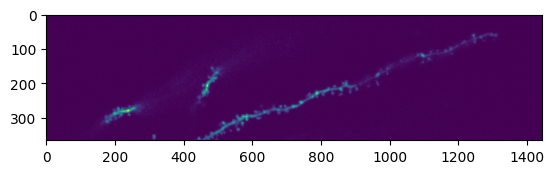

In [4]:
plt.imshow(benchmark[35])

In [5]:
def pad_image_for_patches(image, patch_size=128, pad_value=0):
    """
    Pad the image so that its height and width are multiples of patch_size.
    
    Parameters:
        image (np.ndarray): Input image array (H x W x C) or (H x W).
        patch_size (int): The patch size to pad to, default is 128.
        pad_value (int or tuple): The constant value(s) for padding.
        
    Returns:
        padded_image (np.ndarray): The padded image.
    """
    # # Get original dimensions

    if image.ndim == 3:
        c, h, w = image.shape
    else:
        h, w = image.shape        
    
    # Compute the necessary padding for height and width
    pad_h = (patch_size - h % patch_size) % patch_size
    pad_w = (patch_size - w % patch_size) % patch_size
    
    # # For multi-channel images, pad only height and width dimensions.
    # if image.ndim == 3:
    #     padding = ((0, pad_h), (0, pad_w), (0, 0))
    # else:
    padding = ((0, pad_h), (0, pad_w))
    if image.ndim == 3:
        padded_image = np.array([np.pad(i, padding, mode='constant', constant_values=pad_value) for i in image])
    else:
        padded_image = np.pad(image, padding, mode='constant', constant_values=pad_value)
    return padded_image, (pad_h, pad_w), (h,w)

(71, 384, 1536)


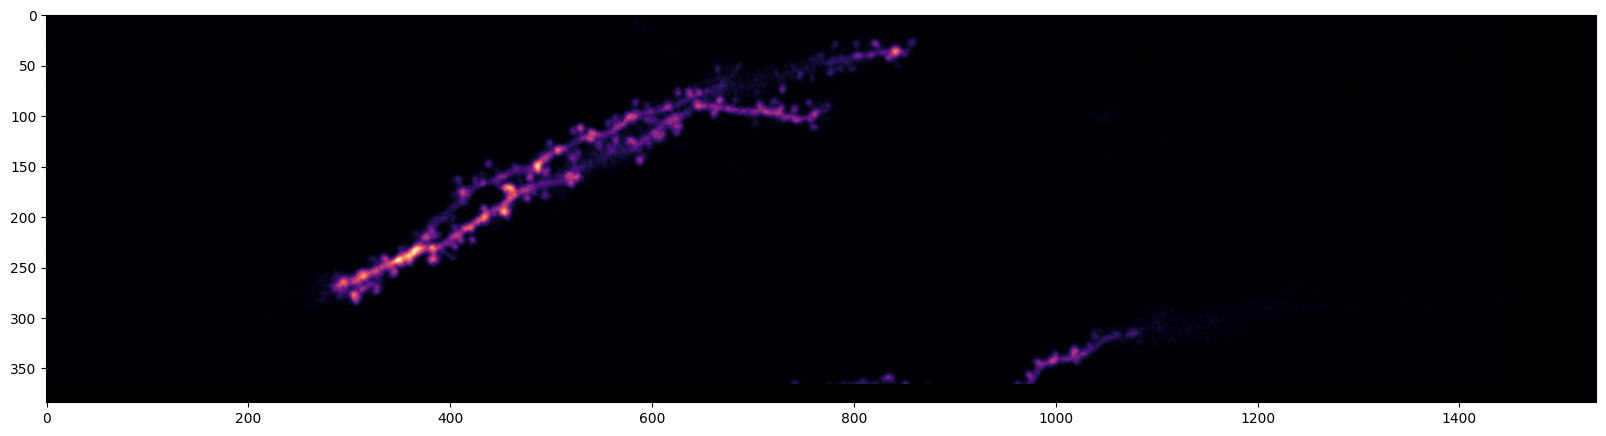

In [6]:
from skimage import data
import matplotlib.pyplot as plt
#
image, padding, original_size = pad_image_for_patches(benchmark, patch_size=128)
plt.figure(figsize=(20, 10))
print(image.shape)
plt.imshow(image[20], cmap='magma')

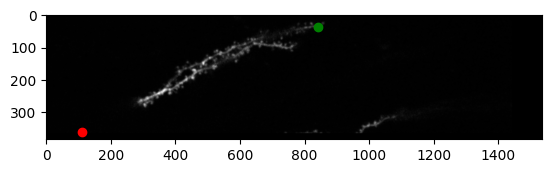

In [37]:
import numpy as np

start_point = np.array([18, 37, 841]) # [y, x] or [z,y,x]
end_point = np.array([51,362, 111]) 
waypoints = [[18, 69, 704], [18,103, 575], [22,177,415], [22,267,292]]
waypoints = [np.array(i) for i in waypoints]

# let's show the start and end points
plt.imshow(image[20], cmap='gray')
plt.plot(start_point[2], start_point[1], 'og')
plt.plot(end_point[2], end_point[1], 'or')

In [29]:
from brightest_path_lib.algorithm import WaypointBidirectionalAStarSearch
search_algorithm = WaypointBidirectionalAStarSearch(image, start_point=start_point, goal_point=end_point, waypoints=waypoints)
brightest_path =search_algorithm.search()

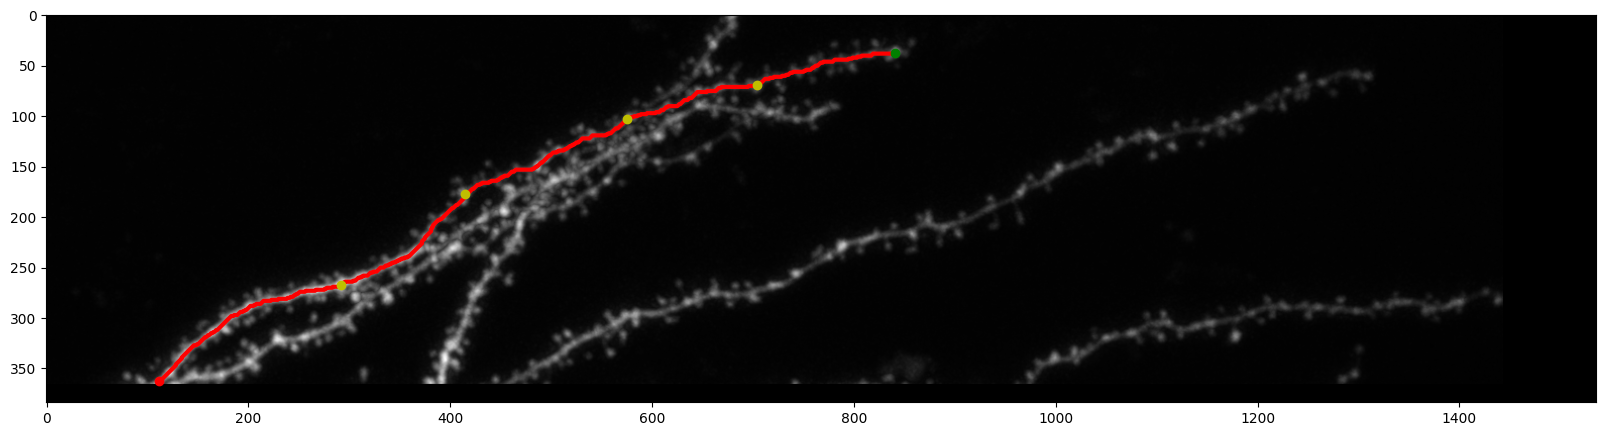

In [36]:
plt.figure(figsize=(20, 10))
plt.imshow(image.max(0), cmap='gray')
plt.plot([point[2] for point in brightest_path], [point[1] for point in brightest_path], 'r', linewidth=3)
plt.plot(start_point[2], start_point[1], 'og')
plt.plot(end_point[2], end_point[1], 'or')
plt.plot([point[2] for point in waypoints], [point[1] for point in waypoints], 'oy')

In [12]:
# plt.figure(figsize=(20, 10))
# plt.imshow(image[55], cmap='gray')
# plt.plot(start_point[2], start_point[1], 'og')
# plt.plot(end_point[2], end_point[1], 'or')
# plt.plot([point[2] for point in brightest_path], [point[1] for point in brightest_path], '-y')


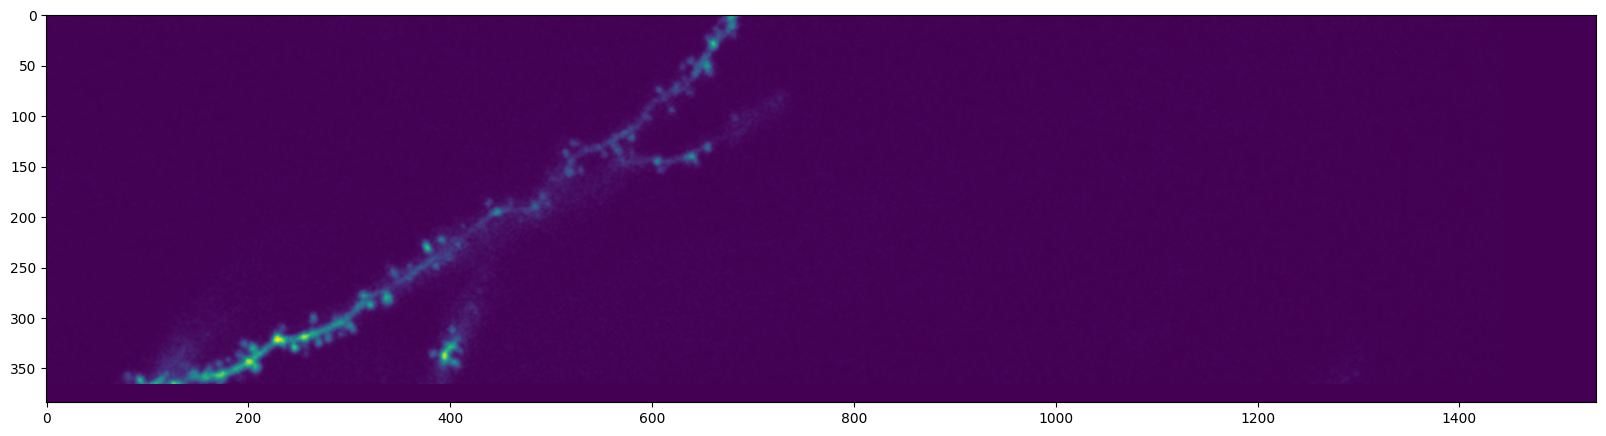

In [13]:
frame = 55
test_image = image[frame]
plt.figure(figsize=(20, 10))
plt.imshow(test_image)

In [14]:
# plt.figure(figsize=(20, 10))
a,b,c,d = 128, 256, 384, 512
patch = test_image[a:b, c:d]
# plt.imshow(patch, cmap='gray')



In [15]:
path = []
thresh = 4
for i in brightest_path:
    if  frame-thresh <= i[0] <= frame+thresh:
        path.append(i)
        

In [ ]:
plt.figure(figsize=(20, 10))
plt.imshow(patch, cmap='gray')
# plt.plot(start_point[2], start_point[1], 'og')
# plt.plot(end_point[2], end_point[1], 'or')
plt.plot([point[2]-c for point in path], [point[1]-a for point in path], 'r', linewidth=3)



In [63]:
# for frame in range(start_point[0], end_point[0]+1):
#     test_image = image[frame]
#     height, width = test_image.shape

#     for i in range(0, height, 128):
#         for j in range(0, width, 128):

#             a,b,c,d = i, i+128, j, j+128
#             patch = test_image[a:b, c:d]

#             # test_image = test_image[i:i+128, j:j+128]


#             path = []
#             for f in brightest_path:
#                 if a<f[1]<b and c<f[2]<d:
#                     path.append(f)

#             # path = []
#             # thresh = 4
#             # for f in brightest_path:
#             #     if  frame-thresh <= f[0] <= frame+thresh:
#             #         path.append(f)
#             # max_x, max_y = max([p[1] for p in path]), max([p[2] for p in path])
#             # min_x, min_y = min([p[1] for p in path]), min([p[2] for p in path])

#             # print(a,b,c,d, min_x, max_x, min_y, max_y)

#             # if ((a<=max_x<=b) and (c<=max_y<=d)) and ((a<=min_x<=b) and (c<=min_y<=d)):
#             if len(path)>0:
#                 plt.imshow(patch, cmap='gray')
#                 plt.plot([point[2]-c for point in path], [point[1]-a for point in path], 'r', linewidth=3)
#                 plt.show()

In [ ]:
# for frame in range(start_point[0], end_point[0]+1):
#     test_image = image[frame]
#     height, width = test_image.shape
    
#     for i in range(0, height, 128):
#         for j in range(0, width, 128):
#             # Define patch boundaries
#             a, b, c, d = i, min(i+128, height), j, min(j+128, width)
#             patch = test_image[a:b, c:d]
            
#             # First check points in the current frame
#             current_frame_points = []
#             for f in brightest_path:
#                 if f[0] == frame and a <= f[1] < b and c <= f[2] < d:
#                     current_frame_points.append(f)
            
#             # Then check nearby frames for points at the same spatial location
#             nearby_frame_points = []
#             frame_range = 3  # Look 3 frames before and after
            
#             for f in brightest_path:
#                 # Check if point is in nearby frame but same spatial location
#                 if (frame - frame_range <= f[0] <= frame + frame_range and 
#                     a <= f[1] < b and c <= f[2] < d):
#                     # This point is in the current patch but from a nearby frame
#                     nearby_frame_points.append(f)
            
#             # Combine unique points (keeping frame info)
#             all_points = current_frame_points.copy()
            
#             # Add only nearby points that don't overlap with current frame points
#             for point in nearby_frame_points:
#                 # Check if this spatial location already exists in current frame
#                 spatial_match = False
#                 for current_point in current_frame_points:
#                     if point[1] == current_point[1] and point[2] == current_point[2]:
#                         spatial_match = True
#                         break
                
#                 if not spatial_match:
#                     all_points.append(point)
#             # Only display if we have enough points
#             if len(all_points) >= 3:
                
#                 plt.figure(figsize=(6, 6))
#                 plt.imshow(patch, cmap='gray')
                
#                 # Connect points in spatial order
#                 # Sort by y-coordinate (or another appropriate criterion)
#                 sorted_points = sorted(all_points, key=lambda p: (p[1], p[2]))
#                 path_y = [p[1]-a for p in sorted_points]
#                 path_x = [p[2]-c for p in sorted_points]
#                 plt.plot(path_x, path_y, color = 'red', linewidth=5, alpha=0.7)
                
#                 # Add title with useful information
#                 plt.title(f"Patch ({frame}, {a}-{b}, {c}-{d})\n")
#                 plt.show()

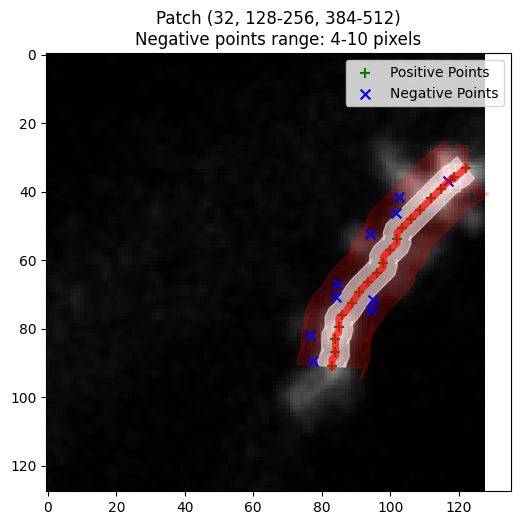

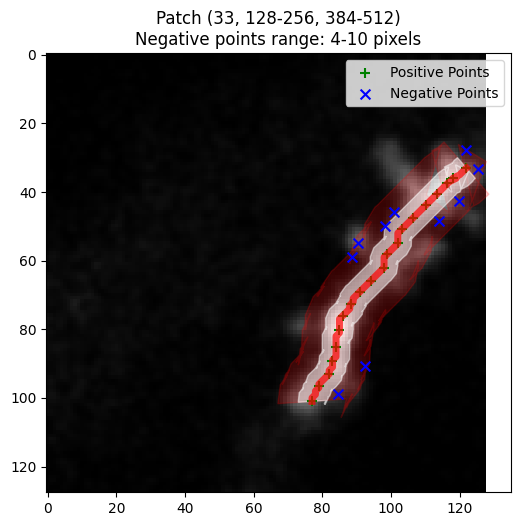

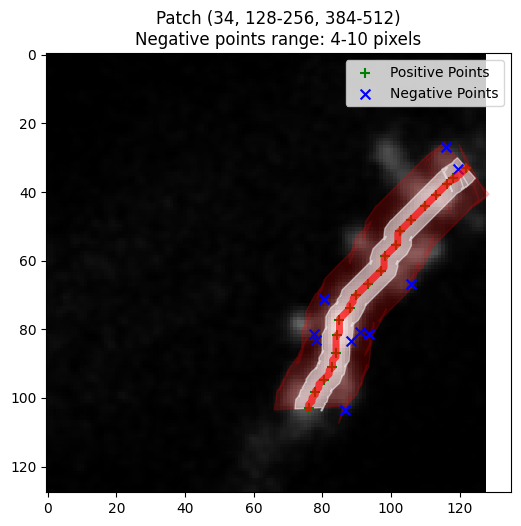

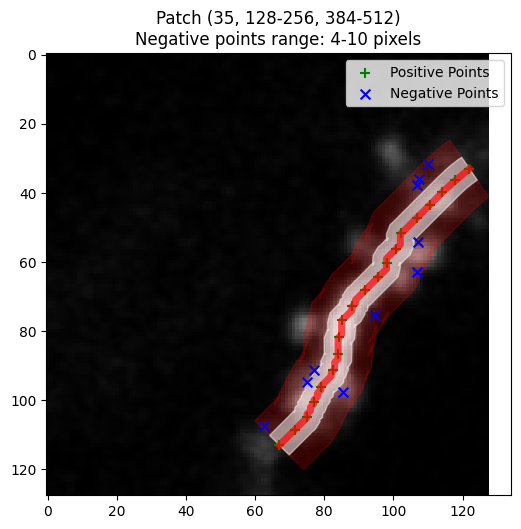

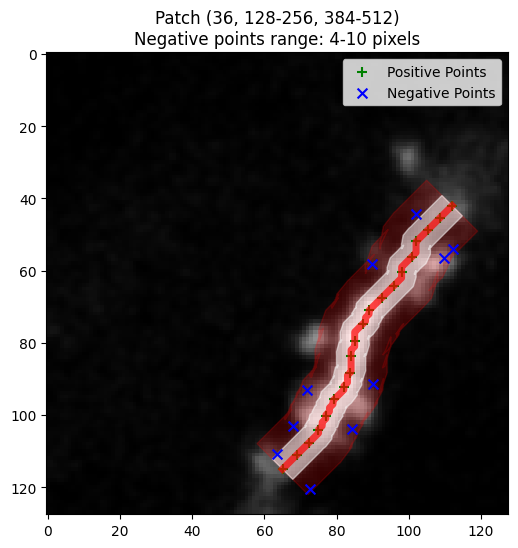

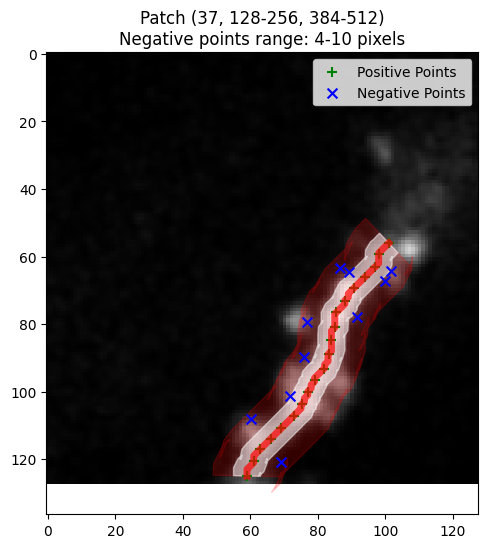

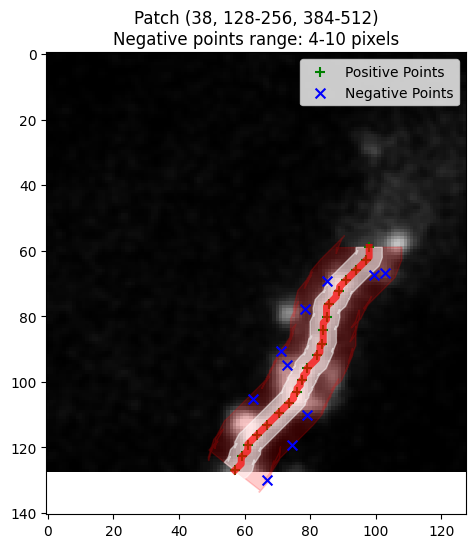

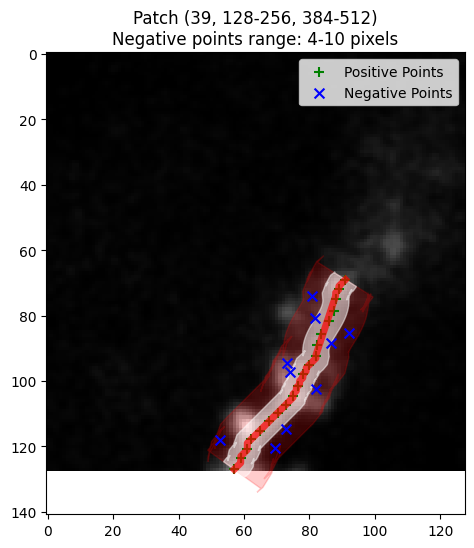

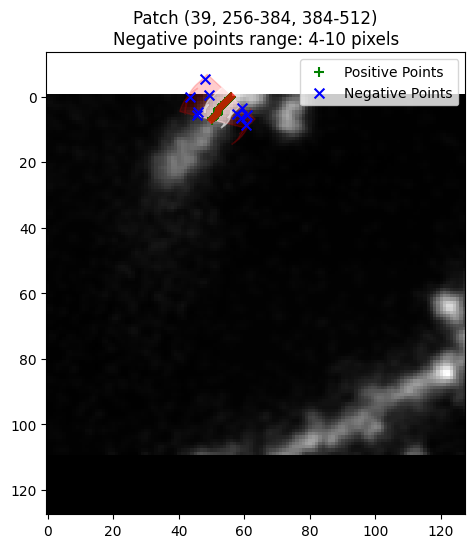

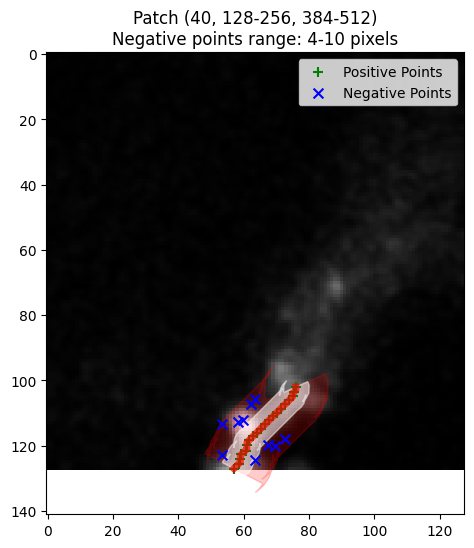

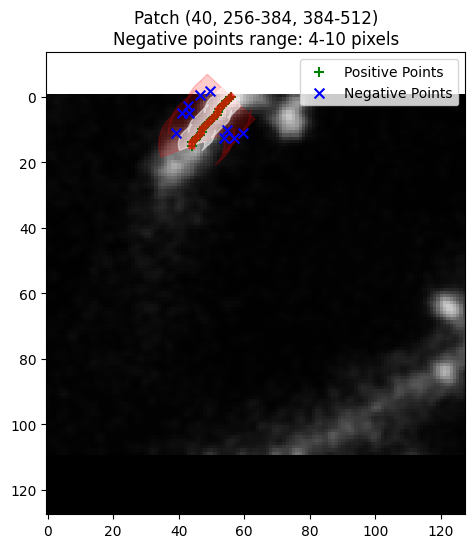

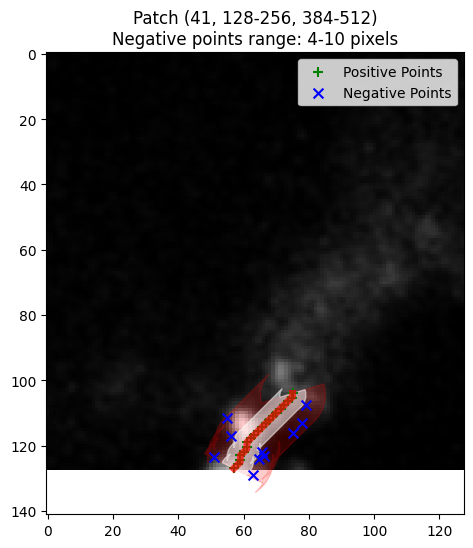

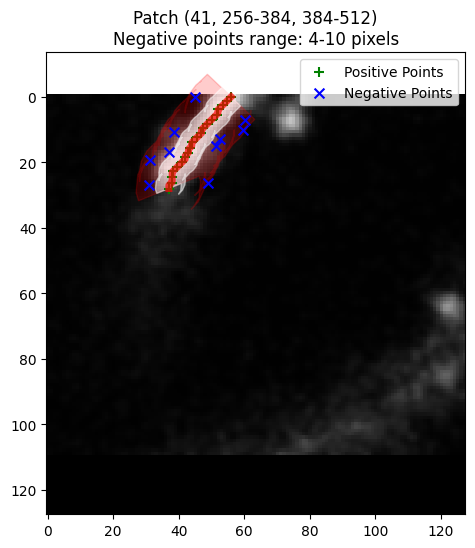

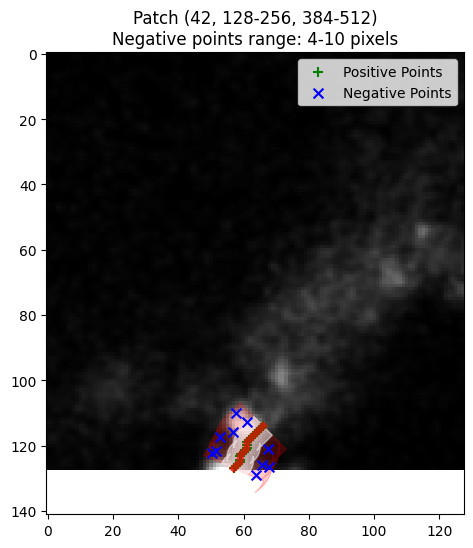

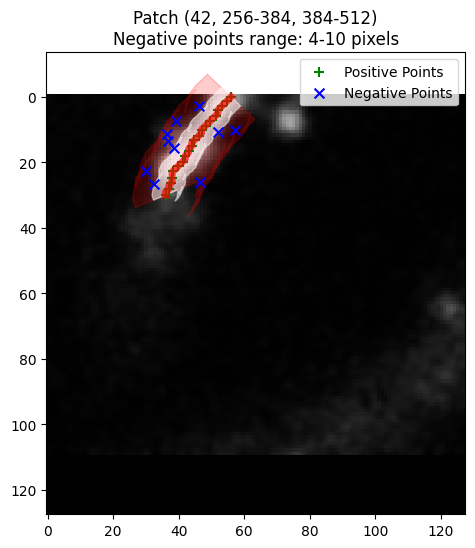

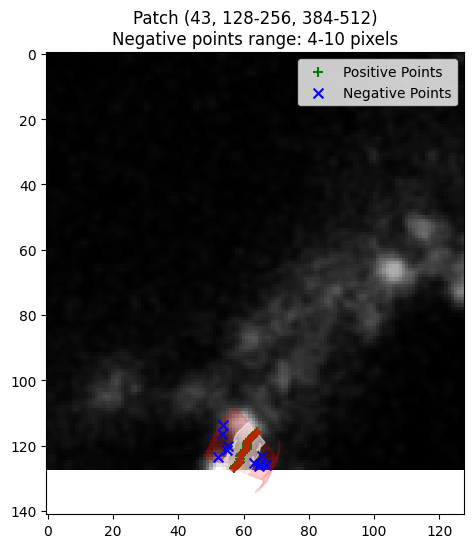

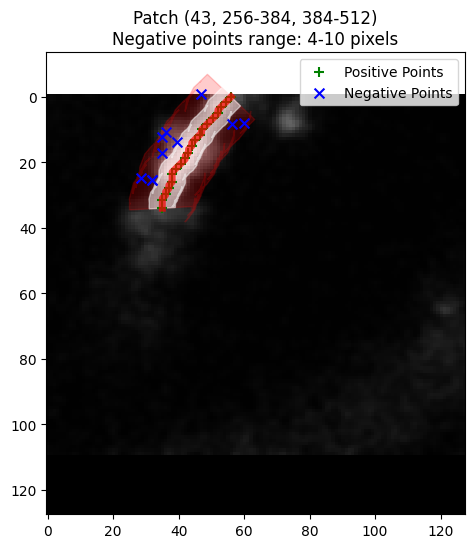

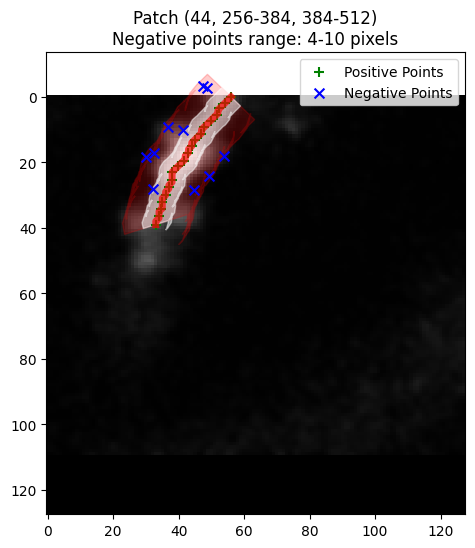

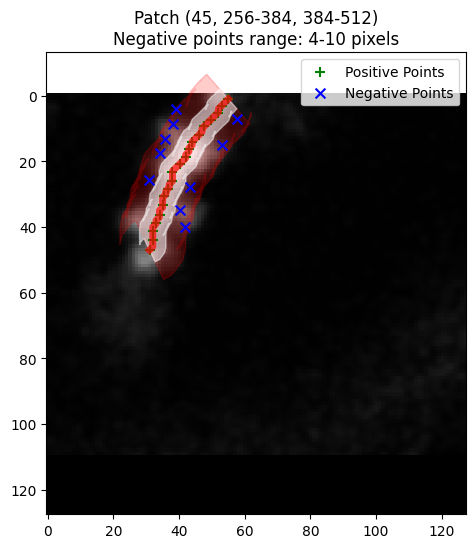

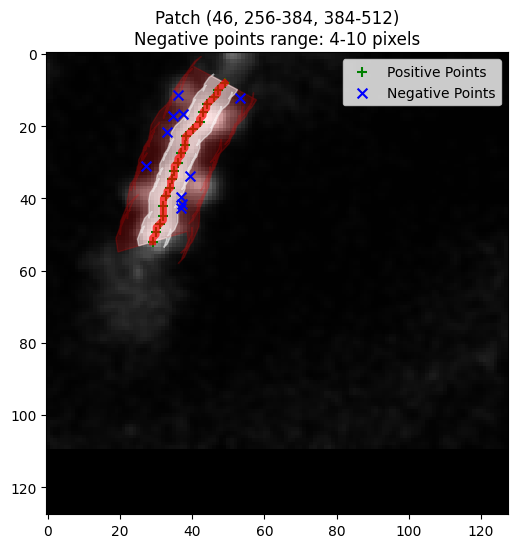

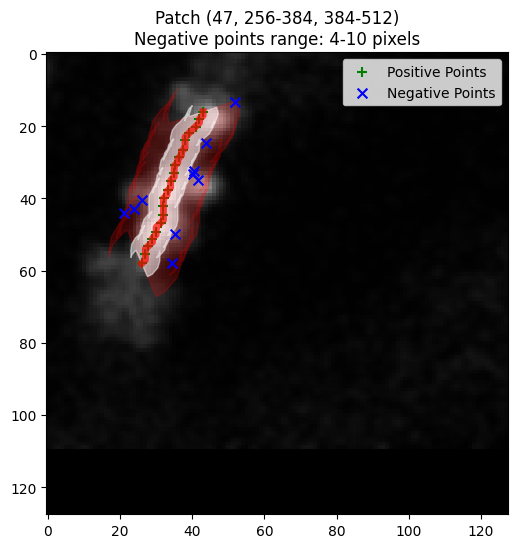

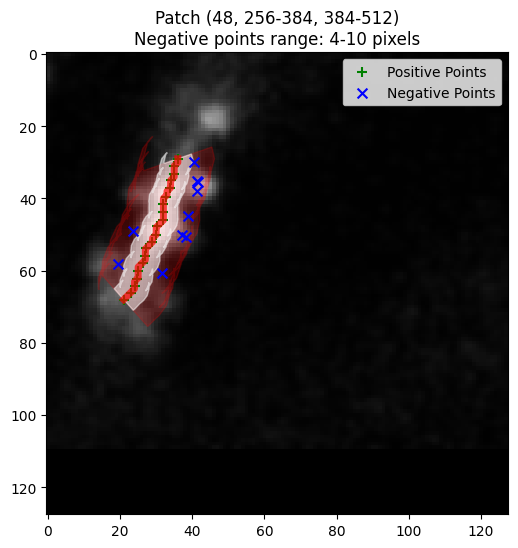

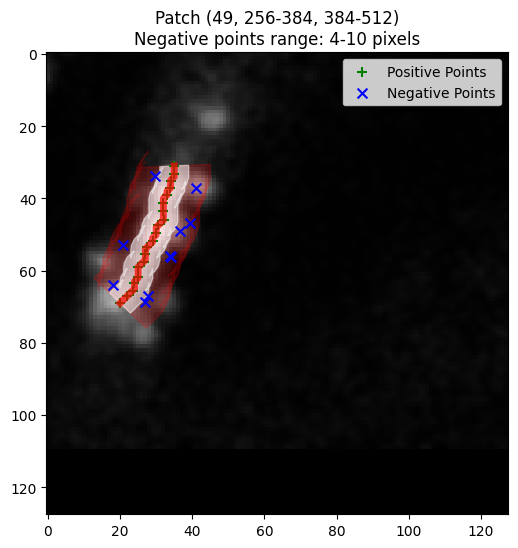

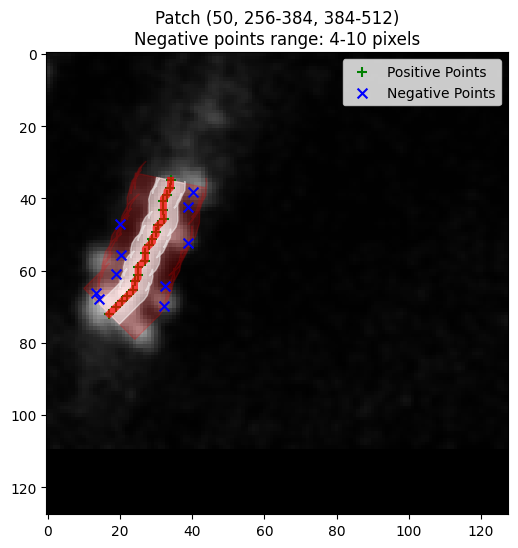

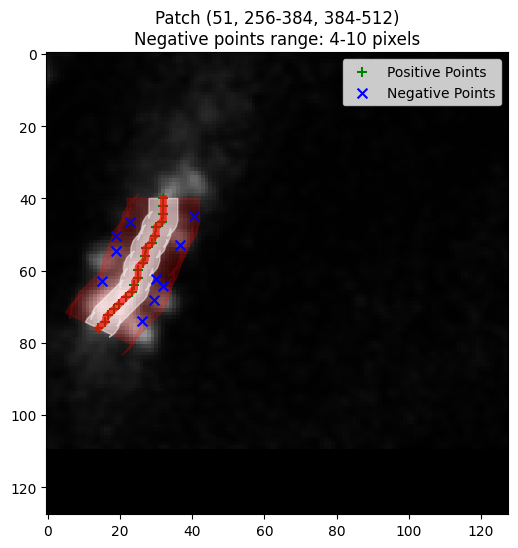

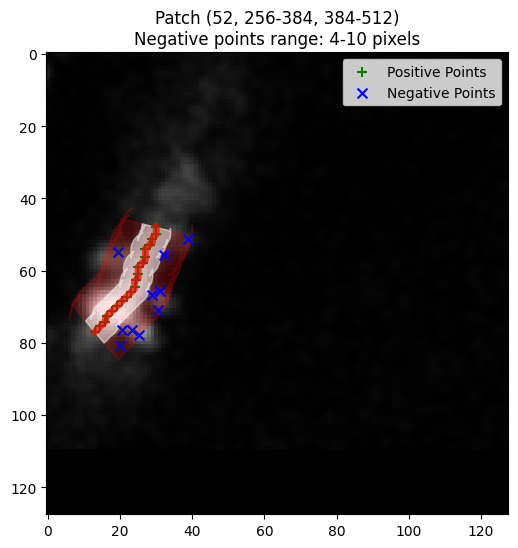

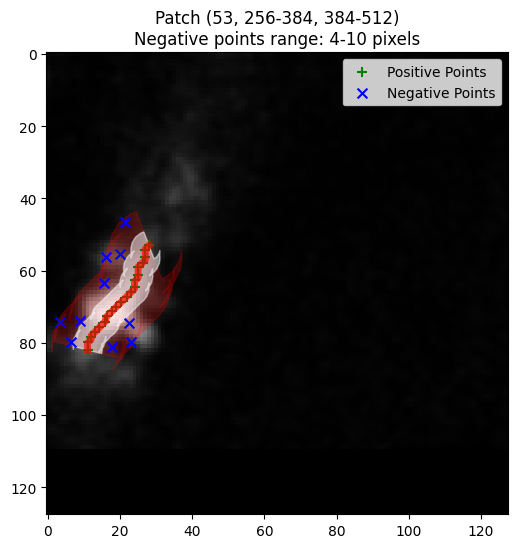

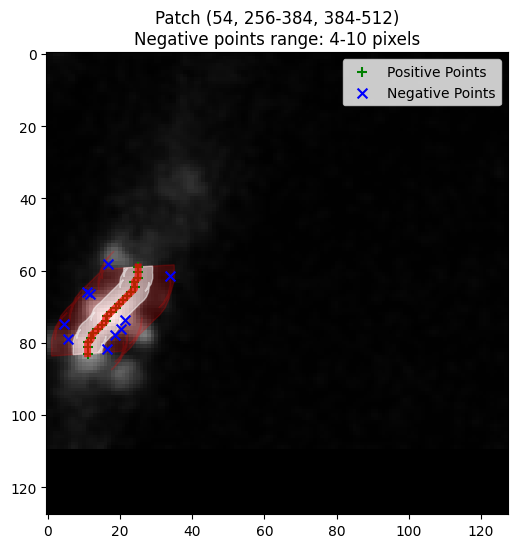

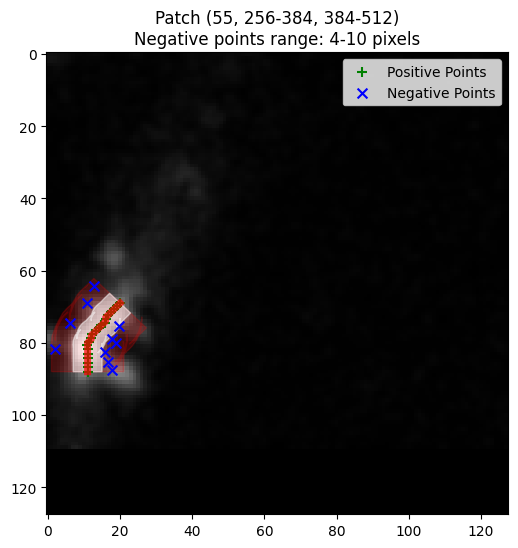

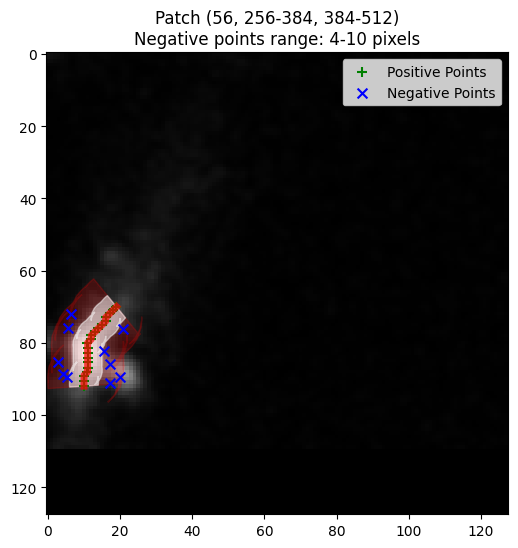

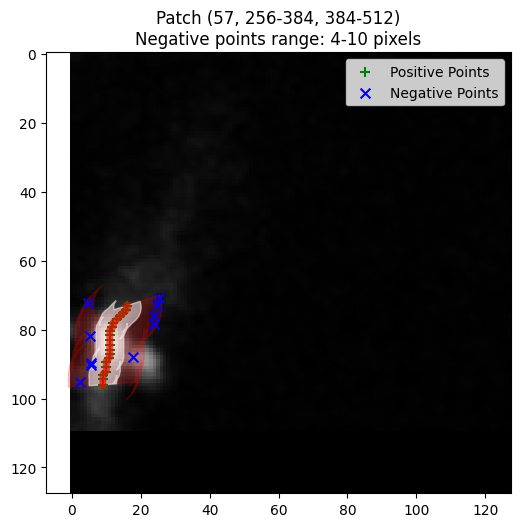

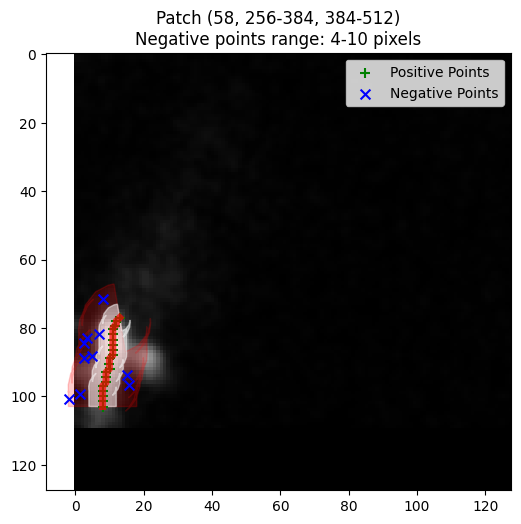

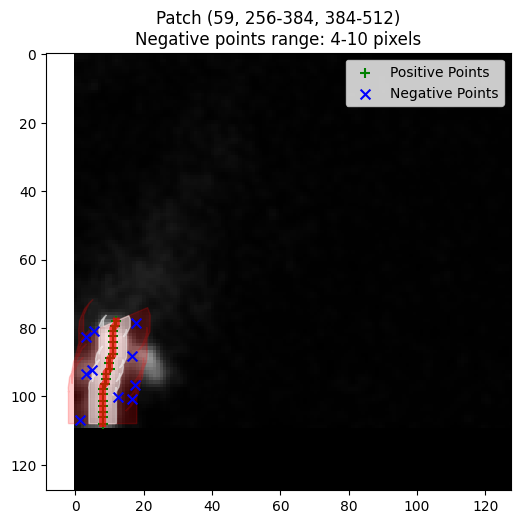

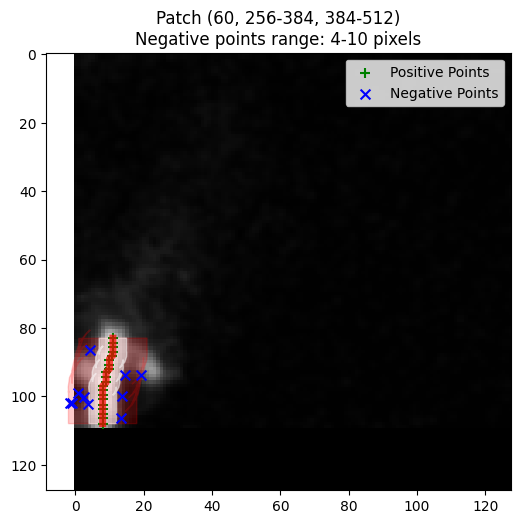

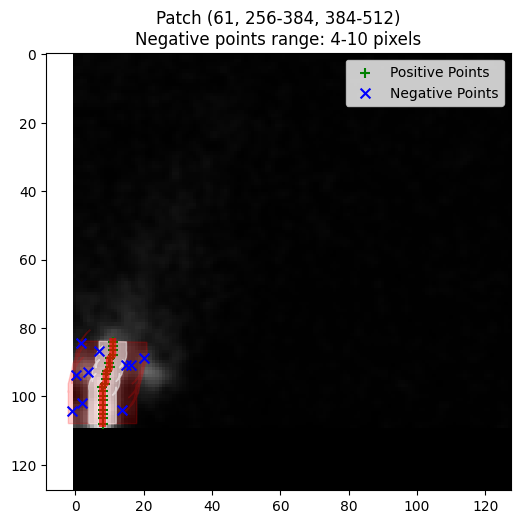

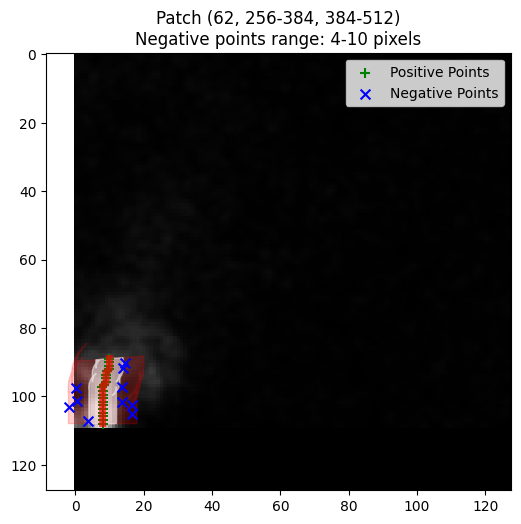

In [ ]:
import numpy as np
from scipy.interpolate import splprep, splev
from matplotlib.path import Path

for frame in range(start_point[0], end_point[0]+1):
    test_image = image[frame]
    height, width = test_image.shape
    for i in range(0, height, 128):
        for j in range(0, width, 128):
            # Define patch boundaries
            a, b, c, d = i, min(i+128, height), j, min(j+128, width)
            patch = test_image[a:b, c:d]
            
            # First check points in the current frame
            current_frame_points = []
            for f in brightest_path:
                if f[0] == frame and a <= f[1] < b and c <= f[2] < d:
                    current_frame_points.append(f)
                    
            # Then check nearby frames for points at the same spatial location
            nearby_frame_points = []
            frame_range = 3  # Look 3 frames before and after
            for f in brightest_path:
                # Check if point is in nearby frame but same spatial location
                if (frame - frame_range <= f[0] <= frame + frame_range and
                    a <= f[1] < b and c <= f[2] < d):
                    # This point is in the current patch but from a nearby frame
                    nearby_frame_points.append(f)
                    
            # Combine unique points (keeping frame info)
            all_points = current_frame_points.copy()
            # Add only nearby points that don't overlap with current frame points
            for point in nearby_frame_points:
                # Check if this spatial location already exists in current frame
                spatial_match = False
                for current_point in current_frame_points:
                    if point[1] == current_point[1] and point[2] == current_point[2]:
                        spatial_match = True
                        break
                if not spatial_match:
                    all_points.append(point)
                    
            # Only display if we have enough points
            if len(all_points) >= 3:
                # Define range parameters for negative points
                min_distance = 4   # Minimum distance from positive points
                max_distance = 10  # Maximum distance from positive points
                
                plt.figure(figsize=(6, 6))
                plt.imshow(patch, cmap='gray')
                
                # Connect points in spatial order
                # Sort by y-coordinate (or another appropriate criterion)
                sorted_points = sorted(all_points, key=lambda p: (p[1], p[2]))
                path_y = [p[1]-a for p in sorted_points]
                path_x = [p[2]-c for p in sorted_points]
                                
                # Set up containers for SAM points
                positive_points = []  # Points on the path (foreground)
                negative_points = []  # Points in the boundary region (background)
                
                # Plot the original path line
                plt.plot(path_x, path_y, color='red', linewidth=5, alpha=0.7)
                
                if len(path_x) >= 3:
                    # Convert to numpy arrays for processing
                    points = np.column_stack([path_x, path_y])
                    
                    # Smooth the path with a spline
                    k = min(3, len(points)-1)
                    try:
                        tck, u = splprep([points[:, 0], points[:, 1]], s=0, k=k)
                        
                        # Generate more points along the spline
                        u_new = np.linspace(0, 1, 100)
                        smooth_x, smooth_y = splev(u_new, tck)
                        
                        # Calculate normals to the path
                        dx = np.gradient(smooth_x)
                        dy = np.gradient(smooth_y)
                        
                        # Normalize vectors and find perpendicular
                        path_length = np.sqrt(dx**2 + dy**2)
                        dx = dx / (path_length + 1e-8)  # Avoid division by zero
                        dy = dy / (path_length + 1e-8)
                        
                        # Perpendicular vectors
                        nx, ny = -dy, dx
                        
                        # Get 20 equidistant points along the path for positive points
                        # Sample evenly from the smoothed path
                        indices = np.linspace(0, len(smooth_x)-1, 20, dtype=int)
                        for idx in indices:
                            positive_points.append((smooth_x[idx], smooth_y[idx]))
                        
                        # Create distance arrays for visualization
                        inner_buffer_x = smooth_x + nx * min_distance
                        inner_buffer_y = smooth_y + ny * min_distance
                        outer_buffer_x = smooth_x + nx * max_distance
                        outer_buffer_y = smooth_y + ny * max_distance
                        
                        inner_buffer_x_lower = smooth_x - nx * min_distance
                        inner_buffer_y_lower = smooth_y - ny * min_distance
                        outer_buffer_x_lower = smooth_x - nx * max_distance
                        outer_buffer_y_lower = smooth_y - ny * max_distance
                        
                        # Create polygons for the inner and outer boundaries
                        inner_boundary_x = np.concatenate([inner_buffer_x, inner_buffer_x_lower[::-1]])
                        inner_boundary_y = np.concatenate([inner_buffer_y, inner_buffer_y_lower[::-1]])
                        
                        outer_boundary_x = np.concatenate([outer_buffer_x, outer_buffer_x_lower[::-1]])
                        outer_boundary_y = np.concatenate([outer_buffer_y, outer_buffer_y_lower[::-1]])
                        
                        # Create Path objects for checking point containment
                        inner_path = Path(np.column_stack([inner_boundary_x, inner_boundary_y]))
                        outer_path = Path(np.column_stack([outer_boundary_x, outer_boundary_y]))
                        
                        # Fill the boundary region (between min and max distance)
                        plt.fill(outer_boundary_x, outer_boundary_y, color='red', alpha=0.2)
                        plt.fill(inner_boundary_x, inner_boundary_y, color='white', alpha=0.5)
                        
                        # Generate 10 random points within the boundary range
                        neg_count = 0
                        max_attempts = 1000
                        attempts = 0
                        
                        # Find the min/max coordinates of the outer boundary
                        min_x, max_x = np.min(outer_boundary_x), np.max(outer_boundary_x)
                        min_y, max_y = np.min(outer_boundary_y), np.max(outer_boundary_y)
                        
                        while neg_count < 10 and attempts < max_attempts:
                            # Generate random point within outer boundary bounding box
                            rand_x = np.random.uniform(min_x, max_x)
                            rand_y = np.random.uniform(min_y, max_y)
                            
                            # Check if point is between the inner and outer boundaries
                            if outer_path.contains_point((rand_x, rand_y)) and not inner_path.contains_point((rand_x, rand_y)):
                                negative_points.append((rand_x, rand_y))
                                neg_count += 1
                            
                            attempts += 1
                        
                        # Plot positive points (on the path)
                        pos_x, pos_y = zip(*positive_points)
                        plt.scatter(pos_x, pos_y, color='green', s=50, marker='+', label='Positive Points')
                        
                        # Plot negative points (within the boundary range)
                        if negative_points:
                            neg_x, neg_y = zip(*negative_points)
                            plt.scatter(neg_x, neg_y, color='blue', s=50, marker='x', label='Negative Points')
                            
                    except Exception as e:
                        print(f"Spline interpolation failed: {e}")
                        # Fallback: sample from original points with distance constraints
                        
                        # Select up to 20 points from original path
                        if len(path_x) <= 20:
                            positive_points = list(zip(path_x, path_y))
                        else:
                            indices = np.linspace(0, len(path_x)-1, 20, dtype=int)
                            positive_points = [(path_x[i], path_y[i]) for i in indices]
                        
                        # Plot positive points
                        pos_x, pos_y = zip(*positive_points)
                        plt.scatter(pos_x, pos_y, color='green', s=50, marker='+', label='Positive Points')
                        
                        # Generate negative points within the specified range from positive points
                        for _ in range(10):
                            # Pick a random point from the path
                            idx = np.random.randint(0, len(positive_points))
                            px, py = positive_points[idx]
                            
                            # Generate a point within the defined range
                            angle = np.random.uniform(0, 2*np.pi)
                            radius = np.random.uniform(min_distance, max_distance)
                            nx = px + radius * np.cos(angle)
                            ny = py + radius * np.sin(angle)
                            
                            # Make sure the point is within the patch
                            nx = max(0, min(nx, patch.shape[1]-1))
                            ny = max(0, min(ny, patch.shape[0]-1))
                            
                            negative_points.append((nx, ny))
                        
                        # Plot negative points
                        neg_x, neg_y = zip(*negative_points)
                        plt.scatter(neg_x, neg_y, color='blue', s=50, marker='x', label='Negative Points')
                        
                        # Visualize the range as circles around a few points
                        for i in range(min(3, len(positive_points))):
                            px, py = positive_points[i]
                            inner_circle = plt.Circle((px, py), min_distance, color='white', fill=False, linestyle='--')
                            outer_circle = plt.Circle((px, py), max_distance, color='red', fill=False, linestyle='--')
                            plt.gca().add_patch(inner_circle)
                            plt.gca().add_patch(outer_circle)
                
                # Add legend and title
                plt.legend()
                plt.title(f"Patch ({frame}, {a}-{b}, {c}-{d})\nNegative points range: {min_distance}-{max_distance} pixels")            
                plt.show()
                
                # Prepare for SAM v2:
                # positive_coords = np.array(positive_points)  # Shape: (20, 2)
                # negative_coords = np.array(negative_points)  # Shape: (10, 2)

In [413]:
width

1536

In [ ]:
from brightest_path_lib.algorithm import NBAStarSearch

In [ ]:
search_algorithm = NBAStarSearch(image, start_point=start_point, goal_point=end_point)
brightest_path =search_algorithm.search()

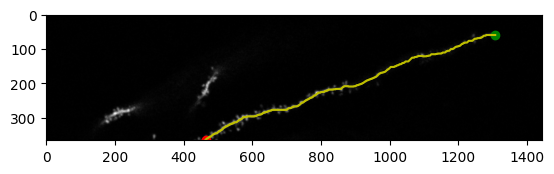

In [ ]:
plt.imshow(image[36], cmap='gray')
plt.plot(start_point[2], start_point[1], 'og')
plt.plot(end_point[2], end_point[1], 'or')
plt.plot([point[2] for point in search_algorithm.result], [point[1] for point in brightest_path], '-y')


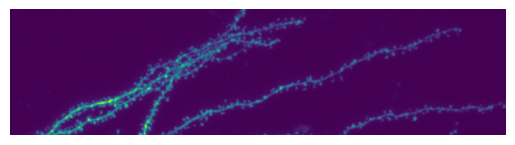

In [23]:
import cv2
import matplotlib.pyplot as plt
max_benchmark = benchmark.max(0)
max_benchmark = (max_benchmark - max_benchmark.min()) / (max_benchmark.max() - max_benchmark.min()) * 255
max_benchmark = max_benchmark.astype(np.uint8)

# Create a figure and axis
fig, ax = plt.subplots()

# Display the data with a colormap
cax = ax.imshow(max_benchmark)  # Change 'viridis' to any colormap you prefer
plt.axis('off')
# Save the figure
plt.savefig("max_benchmark.png", dpi=300, bbox_inches='tight')
# Show the image (optional)
plt.show()